1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d


 Total sec of decay: 183


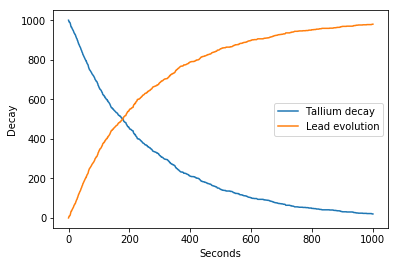

In [2]:
thal = []
lead = []

thal_n = 1000
lead_n = 0

tau_sec = int(3.052*60)
time = 1000

print("\n Total sec of decay:",tau_sec)

prob = 1-2**(-1/tau_sec)

for i in range(time):
    thal.append(thal_n)
    lead.append(lead_n)
    th = np.random.uniform(0,1,size=thal_n)
    n_decay = [x for x in th if x<prob]
    thal_n = thal_n - len(n_decay)
    lead_n = lead_n + len(n_decay)
    
lin = np.linspace(0,time,time)

labels = ["Tallium decay","Lead evolution"]
plt.plot(lin,thal)
plt.plot(lin,lead)
plt.legend(labels)
plt.xlabel("Seconds")
plt.ylabel("Decay")
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [11]:
# Exercise done with the help of the Computational Physics students

N = 1000000
a_0 = 0.529*10**(-9)
g = np.random.random(N)
# The Box-Muller method
b = np.sqrt(-2*(a_0/100)**(2)*np.log(1-g)) 
Z=79
e=1.609*10**(-19)
eps0=8.89*10**(-12)
E=7.7*1.609*10**(-13)
const=Z*e**2/(2*np.pi*eps0*E)
theta=2*np.arctan(const/b)

len(theta[theta>np.pi/2])/N 

1.2e-05

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
# Compute the integral of  f(x)  between 0 and 2 with the hit/miss method. Evaluate the error of your estimate

def f(x):
    return (np.sin(1/(x*(2-x))))**2

# Now we compute the integral using the Monte Carlo method
count=0
random_points =1000

for i in range(random_points):

    x=2*np.random.random() 
    # Since we want that x goes from 0 to 2
    y=np.random.random()
    if y<f(x): 
        count+=1

box_area = 2*1

result = (box_area*count)/random_points

true_value =1.451

print('Hit/miss method: ', np.round(result,6))
print('Error: ', np.abs(np.round((result-true_value),6)))

Hit/miss method:  1.436
Error:  0.015


In [6]:
# Now the same but we more random points

def f(x):
    return (np.sin(1/(x*(2-x))))**2

# Now we compute the integral using the Monte Carlo method
count=0
random_points =100000

for i in range(random_points):

    x=2*np.random.random() 
    # Since we want that x goes from 0 to 2
    y=np.random.random()
    if y<f(x): 
        count+=1

box_area = 2*1

result = (box_area*count)/random_points

true_value =1.451

print('Hit/miss method: ', np.round(result,6))
print('Error: ', np.abs(np.round((result-true_value),6)))

Hit/miss method:  1.4483
Error:  0.0027


In [7]:
# Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one
def f(x):
    return (np.sin(1/(x*(2-x))))**2

random_points =100000

x=2*np.random.random(random_points)

result = 2/random_points*np.sum(f(x))
print('Result with mean value method: ', np.round(result,6))
print('Error: ', np.abs(np.round((result-true_value),6)))

Result with mean value method:  1.449056
Error:  0.001944


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
true_area = np.pi 

random_points = 100000

iterat = 0

for i in range(random_points): 
    x_coord = 2*np.random.random()-1 # multiply by 2 for having points from -1 to 1
    y_coord = 2*np.random.random()-1 
    
    if (x_coord)**2 + (y_coord)**2 <= 1:
        iterat+=1

area = 2*2 # The area of the window 

result = area*iterat/random_points
print('Result with hit/miss method: ',np.round(result,6))
print('The error with the hit/miss method is: ',np.abs(np.round(result-true_area,6)))

Result with hit/miss method:  3.13864
The error with the hit/miss method is:  0.002953


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [9]:
random_points = 1000000

def func(x):
    return x**(-1/2)/(np.exp(x)+1)

def w(x):
    return x**(-1/2)

true_value = 0.8389

x=np.random.random(random_points)

value = 2 
result=1/random_points*np.sum(func(x)/w(x))*value

print('Result: ', np.round(result,6)) 
print('Error: ', np.abs(np.round(result-true_value,6)))


Result:  0.759888
Error:  0.079012
